In [ ]:
import tweepy
import pandas as pd
import numpy as np
import re
from nltk.tokenize import TweetTokenizer

In [ ]:
access_key = "1242513200861655044-6CI2xllf2c4ajWcWhxTaXPDHk3jr6a"
access_secret = "sw1LYhAV6WQncMgrbmE8uEKWBggxWnFftaPxSbkaXhMvJ"

In [ ]:
#twiiter authentication
auth = tweepy.OAuthHandler(consumer_key="7UJbJE9RyNsdHXGctbkqiEM6B", consumer_secret="pc5apOR0d5BZeYim4thjAlkokgxLyeKNlXHnHHlGf0p46dwNeK")
auth.set_access_token(access_key, access_secret)
#creating an API object
api =tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
#api = tweepy.API(auth, wait_on_rate_limit=True)
#api = tweepy.API(auth)

In [ ]:
#'sustainability'or'carbon emission'or'green house gas'or'ghg'or'cost-effectiveness'or'carbon footprint'or'carbon neutrality', 'methane'

In [ ]:
search_term = "shell, 'sustainability' -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(1000)

sustai_twt = [tweet.text for tweet in tweets]

len(sustai_twt)

28

In [ ]:
search_term = "'shell', 'carbon' -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(1000)

em_twt = [tweet.text for tweet in tweets]

em_twt[0:5]
len(em_twt)

122

In [ ]:
search_term = "shell, 'methane' -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(1000)

mthn_twt = [tweet.text for tweet in tweets]

len(mthn_twt)

4

In [ ]:
search_term = "shell, 'ghg' -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(1000)

ghg_twt = [tweet.text for tweet in tweets]

ghg_twt[0:5]
len(ghg_twt)

4

In [ ]:
search_term = "shell, 'carbon footprint' -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(1000)

cf_twt = [tweet.text for tweet in tweets]

cf_twt[0:5]
len(cf_twt)

8

In [ ]:
search_term = "shell, 'energy' -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2015-11-01').items(1500)

enrg_twt = [tweet.text for tweet in tweets]

enrg_twt[0:5]
len(enrg_twt)

1500

In [ ]:
search_term = "shell, 'net zero' -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(1000)

nz_twt = [tweet.text for tweet in tweets]

nz_twt[0:5]
len(nz_twt)

44

In [ ]:
search_term = "shell, 'plastic' -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(1000)

pls_twt = [tweet.text for tweet in tweets]

pls_twt[0:5]
len(pls_twt)

149

In [ ]:
search_term = "shell, 'Polyethylene' -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(1000)

pol_twt = [tweet.text for tweet in tweets]

pol_twt[0:5]
len(pol_twt)

1

In [ ]:
search_term = "shell, 'light' -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(5000)

lig_twt = [tweet.text for tweet in tweets]

len(lig_twt)

366

In [ ]:
df = pd.DataFrame(data = sustai_twt,columns = ['Tweet'])
df1 = pd.DataFrame(data = em_twt,columns = ['Tweet'])
df2 = pd.DataFrame(data = mthn_twt,columns = ['Tweet'])
df3 = pd.DataFrame(data = ghg_twt,columns = ['Tweet'])
df4 = pd.DataFrame(data = cf_twt,columns = ['Tweet'])
df5 = pd.DataFrame(data = enrg_twt,columns = ['Tweet'])
df6 = pd.DataFrame(data = nz_twt,columns = ['Tweet'])
df7 = pd.DataFrame(data = pls_twt,columns = ['Tweet'])
df8 = pd.DataFrame(data = pol_twt,columns = ['Tweet'])
df9 = pd.DataFrame(data = lig_twt,columns = ['Tweet'])

In [ ]:
final_df = pd.concat([df,df1,df2,df3,df4,df5,df6,df7,df8],axis = 0)

In [ ]:
final_df

,Tweet
0,Why buy a Tesla? I don't mean what's the case...
1,@the_Notorious_I @johnpavlovitz @ksorbs So … w...
2,"In 2020, The Green Universe Enterprise signed ..."
3,At 58 Redevco sites across Belgium Electric ve...
4,There are more people joining the #ClimateActi...
...,...
145,"#Libya - ""Investigators suspect that a booby t..."
146,@LowTeaTime The beauty of no plastic surgery. ...
147,his is a 600 tonne machine producing a chair s...
148,@reddit_TLCM didnt they ban kinder eggs cause ...


### Preprocessing


In [ ]:
#Lowercase
final_df['Tweet'] = final_df.Tweet.str.lower()

In [ ]:
#URL links
final_df.Tweet = final_df.Tweet.apply(lambda x: re.sub(r'https?:\/\/\S+', '', x))

In [ ]:
final_df.Tweet = final_df.Tweet.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))

In [ ]:
#Placeholders link&videos
final_df.Tweet = final_df.Tweet.apply(lambda x: re.sub(r'{link}', '', x))
final_df.Tweet = final_df.Tweet.apply(lambda x: re.sub(r"\[video\]", '', x))

In [ ]:
#HTML reference characters
final_df.Tweet = final_df.Tweet.apply(lambda x: re.sub(r'&[a-z]+;', '', x))

In [ ]:
#remove @mentions
final_df.Tweet = final_df.Tweet.apply(lambda x:re.sub("@[A-Za-z0-9_]+","",x))


In [ ]:
#remove #hashtags
final_df.Tweet = final_df.Tweet.apply(lambda x:re.sub("#[A-Za-z0-9_]+","",x))


In [ ]:
#Non-letter characters
final_df.Tweet = final_df.Tweet.apply(lambda x: re.sub(r"[^a-z\s\(\-\:\)\\\/\];='#]", '', x))

In [ ]:
final_df

,Tweet
0,why buy a tesla i don't mean what's the case ...
1,so what happened to their multi-trillion d...
2,in the green universe enterprise signed a con...
3,at redevco sites across belgium electric vehi...
4,there are more people joining the movement an...
...,...
145,- investigators suspect that a booby trap fou...
146,the beauty of no plastic surgery her face is ...
147,his is a tonne machine producing a chair shel...
148,didnt they ban kinder eggs cause american kid...


In [ ]:
#drop duplicated
final_df.drop_duplicates(inplace=True)

In [ ]:
final_df

,Tweet
0,why buy a tesla i don't mean what's the case ...
1,so what happened to their multi-trillion d...
2,in the green universe enterprise signed a con...
3,at redevco sites across belgium electric vehi...
4,there are more people joining the movement an...
...,...
145,- investigators suspect that a booby trap fou...
146,the beauty of no plastic surgery her face is ...
147,his is a tonne machine producing a chair shel...
148,didnt they ban kinder eggs cause american kid...


Sentiment Analyse

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 8.2 MB/s 


In [ ]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
final_df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in final_df["Tweet"]]
final_df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in final_df["Tweet"]]
final_df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in final_df["Tweet"]]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
final_df = final_df[["Tweet", "Positive", 
             "Negative", "Neutral"]]
print(final_df.head())

                                               Tweet  Positive  Negative  \
0  why buy a tesla  i don't mean what's the case ...     0.234       0.0   
1     so  what happened to their multi-trillion d...     0.225       0.0   
2  in  the green universe enterprise signed a con...     0.000       0.0   
3  at  redevco sites across belgium electric vehi...     0.000       0.0   
4  there are more people joining the  movement an...     0.162       0.0   

   Neutral  
0    0.766  
1    0.775  
2    1.000  
3    1.000  
4    0.838  


In [ ]:
x = sum(final_df['Positive'])
y = sum(final_df['Negative'])
z = sum(final_df['Neutral'])

def sentiment_score(a,b,c):
  if (a>b) and (a>c):
    print('Positive')
  elif (b>a) and (b>c):
    print('Negative')
  else:
    print('Neutral')

sentiment_score(x,y,z)

Neutral


In [ ]:
from matplotlib import pyplot as plt

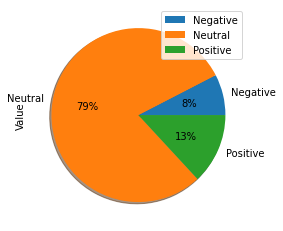

In [ ]:

df = pd.DataFrame({'Sentiment':['Positive','Negative','Neutral'],'Value':[x,y,z]})
df.groupby(['Sentiment']).sum().plot(kind='pie', y='Value', autopct='%1.0f%%',shadow = True)

### Word Cloud

In [ ]:
tknzr = TweetTokenizer()
final_df['Tokens'] = final_df['Tweet'].apply(tknzr.tokenize)

In [ ]:
final_df

,Tweet,Positive,Negative,Neutral,Tokens
0,why buy a tesla i don't mean what's the case ...,0.234,0.000,0.766,"[why, buy, a, tesla, i, don't, mean, what's, t..."
1,so what happened to their multi-trillion d...,0.225,0.000,0.775,"[so, what, happened, to, their, multi-trillion..."
2,in the green universe enterprise signed a con...,0.000,0.000,1.000,"[in, the, green, universe, enterprise, signed,..."
3,at redevco sites across belgium electric vehi...,0.000,0.000,1.000,"[at, redevco, sites, across, belgium, electric..."
4,there are more people joining the movement an...,0.162,0.000,0.838,"[there, are, more, people, joining, the, movem..."
...,...,...,...,...,...
145,- investigators suspect that a booby trap fou...,0.000,0.257,0.743,"[-, investigators, suspect, that, a, booby, tr..."
146,the beauty of no plastic surgery her face is ...,0.386,0.083,0.530,"[the, beauty, of, no, plastic, surgery, her, f..."
147,his is a tonne machine producing a chair shel...,0.000,0.000,1.000,"[his, is, a, tonne, machine, producing, a, cha..."
148,didnt they ban kinder eggs cause american kid...,0.113,0.266,0.620,"[didnt, they, ban, kinder, eggs, cause, americ..."


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud

In [ ]:
word_cloud = WordCloud(collocations=False,background_color = 'white').generate(str(final_df.Tokens))

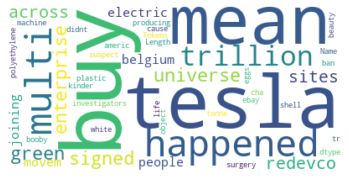

In [ ]:
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()